# Importing libraries

In [8]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

# Load playlist dataset

In [10]:
df = pd.read_csv('pulpkoki.csv')
df = df.iloc[:,1:] #remove first column
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.398,0.952,-6.042,0.0610,0.000373,0.000077,0.1000,0.584,122.093,278680.0
1,0.711,0.833,-12.756,0.0851,0.014400,0.000003,0.3030,0.756,103.153,203227.0
2,0.276,0.715,-5.356,0.0432,0.005520,0.000417,0.2010,0.173,137.028,230760.0
3,0.309,0.649,-8.994,0.0350,0.015800,0.005910,0.3670,0.312,166.915,306440.0
4,0.575,0.555,-7.495,0.0453,0.103000,0.000001,0.1110,0.504,95.361,232467.0
...,...,...,...,...,...,...,...,...,...,...
1611,0.726,0.449,-9.206,0.0286,0.487000,0.000001,0.0824,0.294,130.388,241333.0
1612,0.572,0.209,-10.413,0.0313,0.765000,0.000000,0.3560,0.446,80.069,249668.0
1613,0.638,0.831,-3.944,0.1820,0.028100,0.000003,0.2770,0.685,175.038,223053.0
1614,0.771,0.680,-5.881,0.2240,0.277000,0.000012,0.6820,0.808,119.952,276160.0


# Standardize the data

In [11]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,0.605852,0.683815,-7.618670,0.056622,0.187576,0.041345,0.188417,0.564364,120.887854,246962.026625
std,0.147222,0.193267,3.459725,0.052024,0.229319,0.153311,0.159537,0.250058,26.589624,62989.794131
min,0.126000,0.006740,-37.492000,0.022500,0.000005,0.000000,0.024400,0.030500,51.216000,36779.000000
25%,0.514000,0.562500,-9.461000,0.031700,0.018300,0.000000,0.088650,0.367500,102.415000,210333.500000
50%,0.617000,0.713000,-6.897000,0.039500,0.086200,0.000023,0.124000,0.571000,119.949000,238173.000000
75%,0.712500,0.838000,-5.133000,0.056850,0.262500,0.002070,0.253500,0.780500,135.974000,272740.000000
max,0.978000,0.999000,-0.105000,0.499000,0.996000,0.973000,0.995000,0.981000,206.680000,900000.000000


In [13]:
scaler = StandardScaler()  
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled #displays only the scaled numbers in numpy array

array([[-1.41226467,  1.38806817,  0.45586235, ...,  0.07855039,
         0.04533794,  0.50369744],
       [ 0.71443517,  0.77214862, -1.48535546, ...,  0.76660289,
        -0.66719062, -0.69453431],
       [-2.24120199,  0.16140486,  0.65420543, ..., -1.56557507,
         0.60719718, -0.25729637],
       ...,
       [ 0.21843169,  0.76179703,  1.06245677, ...,  0.48258122,
         2.03714495, -0.37968742],
       [ 1.12210927, -0.01974795,  0.50241226, ...,  0.97461876,
        -0.03520713,  0.46367856],
       [-0.82793181,  0.24421757,  0.26734969, ..., -0.2174722 ,
        -0.72358346, -0.67781214]])

In [31]:
df_scaled2 = pd.DataFrame(df_scaled, columns = df.columns) #this way I give names to columns and transform the array in dataframe (not scaled)
display(df.head()) #same as print
display(df_scaled2.head()) #display the scaled dataframe

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.398,0.952,-6.042,0.0610,0.000373,0.000077,0.100,0.584,122.093,278680.0
1,0.711,0.833,-12.756,0.0851,0.014400,0.000003,0.303,0.756,103.153,203227.0
2,0.276,0.715,-5.356,0.0432,0.005520,0.000417,0.201,0.173,137.028,230760.0
3,0.309,0.649,-8.994,0.0350,0.015800,0.005910,0.367,0.312,166.915,306440.0
4,0.575,0.555,-7.495,0.0453,0.103000,0.000001,0.111,0.504,95.361,232467.0


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-1.412265,1.388068,0.455862,0.084183,-0.816597,-0.269260,-0.554382,0.078550,0.045338,0.503697
1,0.714435,0.772149,-1.485355,0.547572,-0.755410,-0.269743,0.718447,0.766603,-0.667191,-0.694534
2,-2.241202,0.161405,0.654205,-0.258071,-0.794145,-0.267045,0.078897,-1.565575,0.607197,-0.257296
3,-2.016981,-0.180198,-0.397649,-0.415739,-0.749303,-0.231205,1.119732,-1.009533,1.731555,0.944540
4,-0.209626,-0.666722,0.035757,-0.217693,-0.368928,-0.269757,-0.485411,-0.241474,-0.960328,-0.230188


In [32]:
df_scaled2.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03
mean,-1.203028e-16,2.324422e-16,4.114356e-17,-5.179895e-17,-1.718611e-17,7.977795e-17,2.282316e-17,1.957498e-16,-4.599692e-16,1.297895e-16
std,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00,1.000310e+00
min,-3.260387e+00,-3.504403e+00,-8.637271e+00,-6.560858e-01,-8.182030e-01,-2.697658e-01,-1.028401e+00,-2.135619e+00,-2.621076e+00,-3.337813e+00
25%,-6.240948e-01,-6.279038e-01,-5.326726e-01,-4.791904e-01,-7.383975e-01,-2.697658e-01,-6.255477e-01,-7.875157e-01,-6.949544e-01,-5.816795e-01
50%,7.574576e-02,1.510533e-01,2.086563e-01,-3.292138e-01,-4.422112e-01,-2.696145e-01,-4.038999e-01,2.654642e-02,-3.531999e-02,-1.395742e-01
75%,7.246270e-01,7.980276e-01,7.186814e-01,4.387859e-03,3.268261e-01,-2.562597e-01,4.080770e-01,8.646104e-01,5.675454e-01,4.093672e-01
max,2.528585e+00,1.631331e+00,2.172426e+00,8.505943e+00,3.526423e+00,6.078769e+00,5.057350e+00,1.666672e+00,3.227527e+00,1.037057e+01


# Save the scaler for future use

In [27]:
import pickle
with open("pulpkokiscaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

In [28]:
pulpkokiscaler = load("pulpkokiscaler.pickle")

In [40]:
df_scaled2.dropna(inplace=True)
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.398,0.952,-6.042,0.0610,0.000373,0.000077,0.1000,0.584,122.093,278680.0
1,0.711,0.833,-12.756,0.0851,0.014400,0.000003,0.3030,0.756,103.153,203227.0
2,0.276,0.715,-5.356,0.0432,0.005520,0.000417,0.2010,0.173,137.028,230760.0
3,0.309,0.649,-8.994,0.0350,0.015800,0.005910,0.3670,0.312,166.915,306440.0
4,0.575,0.555,-7.495,0.0453,0.103000,0.000001,0.1110,0.504,95.361,232467.0
...,...,...,...,...,...,...,...,...,...,...
1611,0.726,0.449,-9.206,0.0286,0.487000,0.000001,0.0824,0.294,130.388,241333.0
1612,0.572,0.209,-10.413,0.0313,0.765000,0.000000,0.3560,0.446,80.069,249668.0
1613,0.638,0.831,-3.944,0.1820,0.028100,0.000003,0.2770,0.685,175.038,223053.0
1614,0.771,0.680,-5.881,0.2240,0.277000,0.000012,0.6820,0.808,119.952,276160.0


# Choosing the number of clusters k and fitting k means cluster

In [41]:
#find best K

#kmeans = KMeans(n_clusters=3, random_state=1234)
#kmeans.fit(df_scaled2)

In [47]:
K = range(4, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled2)
    inertia.append(kmeans.inertia_)

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



# Build the elbow graph to find the best k.

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

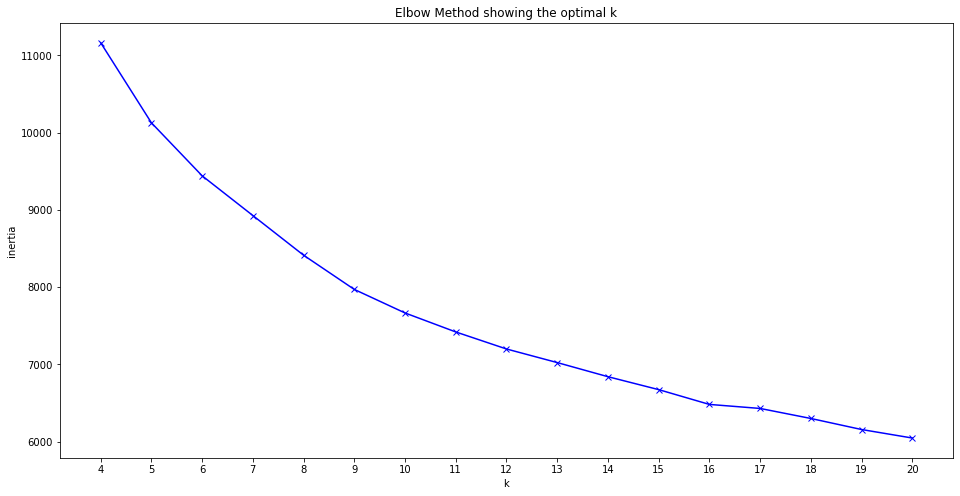

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [44]:
# K MEANS
kmeans = KMeans(n_clusters=16, random_state=1234)
kmeans.fit(df_scaled2)

KMeans(n_clusters=16, random_state=1234)

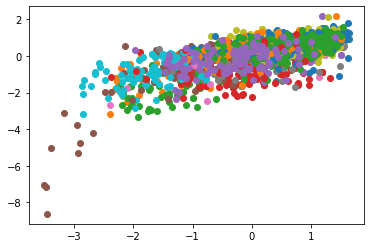

0     162
1      75
2      74
3     162
4      53
5     139
6      26
7      44
8     221
9      78
10    222
11     74
12    144
13     20
14    108
15     13
dtype: int64

In [46]:
kmeans.labels_
# assign a cluster to each example
labels = kmeans.predict(df_scaled2)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df_scaled2.to_numpy()[row_ix, 1], df_scaled2.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()
clusters = kmeans.predict(df_scaled2)
#clusters
pd.Series(clusters).value_counts().sort_index()

In [51]:
kmeans = KMeans(n_clusters=16, random_state=1234)
kmeans.fit(df_scaled2)

KMeans(n_clusters=16, random_state=1234)

In [52]:
kmeans.labels_

array([10,  3,  5, ..., 11, 11, 14], dtype=int32)

In [54]:
#add column cluster to dataframe
#X_df = pd.DataFrame(X)
df_scaled2["cluster"] = clusters
df_scaled2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,-1.412265,1.388068,0.455862,0.084183,-0.816597,-0.269260,-0.554382,0.078550,0.045338,0.503697,10
1,0.714435,0.772149,-1.485355,0.547572,-0.755410,-0.269743,0.718447,0.766603,-0.667191,-0.694534,3
2,-2.241202,0.161405,0.654205,-0.258071,-0.794145,-0.267045,0.078897,-1.565575,0.607197,-0.257296,5
3,-2.016981,-0.180198,-0.397649,-0.415739,-0.749303,-0.231205,1.119732,-1.009533,1.731555,0.944540,12
4,-0.209626,-0.666722,0.035757,-0.217693,-0.368928,-0.269757,-0.485411,-0.241474,-0.960328,-0.230188,10
...,...,...,...,...,...,...,...,...,...,...,...
1611,0.816354,-1.215356,-0.458944,-0.538796,1.306116,-0.269757,-0.664736,-1.081538,0.357398,-0.089392,14
1612,-0.230010,-2.457547,-0.807924,-0.486881,2.518779,-0.269766,1.050761,-0.473492,-1.535618,0.042972,9
1613,0.218432,0.761797,1.062457,2.410742,-0.695649,-0.269746,0.555424,0.482581,2.037145,-0.379687,11
1614,1.122109,-0.019748,0.502412,3.218308,0.390076,-0.269689,3.094812,0.974619,-0.035207,0.463679,11


# Use the model with the best k to assign every observation in your data frame to its cluster number ( adding cluster columns to the pandas data frame) using model.predict

In [53]:
#clusters = kmeans.predict(X_scaled_df)
#clusters
#pd.Series(clusters).value_counts().sort_index()